In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("raw_sales.csv")
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [3]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [4]:
df.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [5]:
df.isnull().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [6]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [12]:
df_filter =  df[df['datesold']== '2019-07-25 00:00:00']
df_filter.head()

,datesold,postcode,price,propertyType,bedrooms
24538,2019-07-25 00:00:00,2913,421000,house,2
24539,2019-07-25 00:00:00,2913,459000,house,3
24540,2019-07-25 00:00:00,2906,560000,house,3
24541,2019-07-25 00:00:00,2615,628000,house,3
24542,2019-07-25 00:00:00,2602,731000,house,3


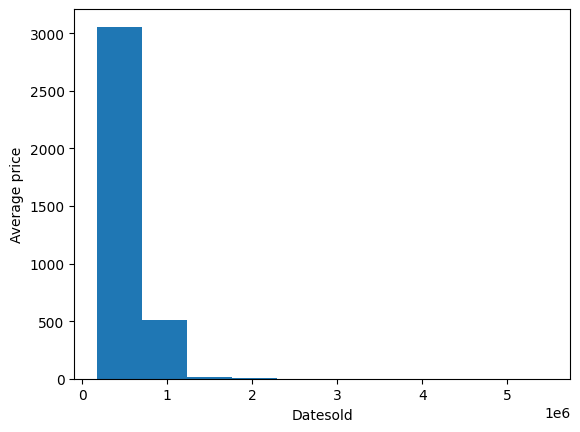

In [15]:
avg_price = df.groupby('datesold')['price'].mean()
avg_price.plot(kind='hist')
plt.xlabel('Datesold')
plt.ylabel('Average price')
plt.show()

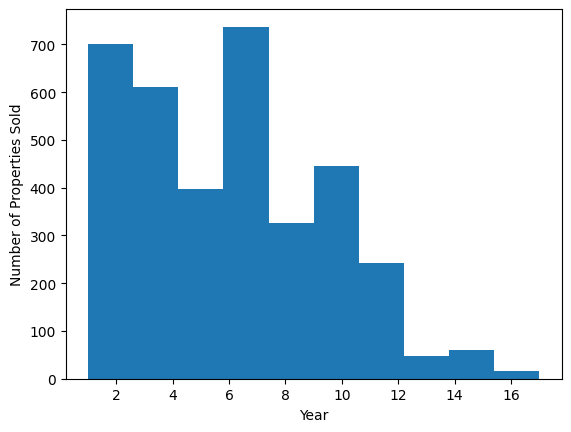

In [17]:
properties_sold_per_year = df.groupby('datesold')['postcode'].nunique()
properties_sold_per_year.plot(kind='hist')
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.show()


In [18]:
df_filtered = df[(df['datesold'] >= '2011-02-15 00:00:00') & (df['datesold'] <= '2014-11-21 00:00:00')]


In [20]:
df_filtered

,datesold,postcode,price,propertyType,bedrooms
3453,2011-02-15 00:00:00,2913,406000,house,3
3454,2011-02-15 00:00:00,2906,420000,house,3
3455,2011-02-15 00:00:00,2905,449000,house,3
3456,2011-02-15 00:00:00,2902,460000,house,3
3457,2011-02-15 00:00:00,2615,466000,house,3
...,...,...,...,...,...
26004,2014-11-20 00:00:00,2606,268000,unit,1
26005,2014-11-20 00:00:00,2612,450000,unit,2
26006,2014-11-20 00:00:00,2601,460000,unit,2
26007,2014-11-21 00:00:00,2601,424000,unit,1


In [22]:
df['datesold'] = pd.to_datetime(df['datesold'], errors ='coerce')

In [24]:
mean_price_per_month = df.groupby(df['datesold'].dt.to_period('M'))['price'].mean()
mean_price_per_month

datesold
2007-02    407500.000000
2007-03    339333.333333
2007-04    798000.000000
2007-05    339500.000000
2007-06    520333.333333
               ...      
2019-03    651666.737288
2019-04    655325.561321
2019-05    641491.136364
2019-06    703275.396825
2019-07    583192.056000
Freq: M, Name: price, Length: 150, dtype: float64

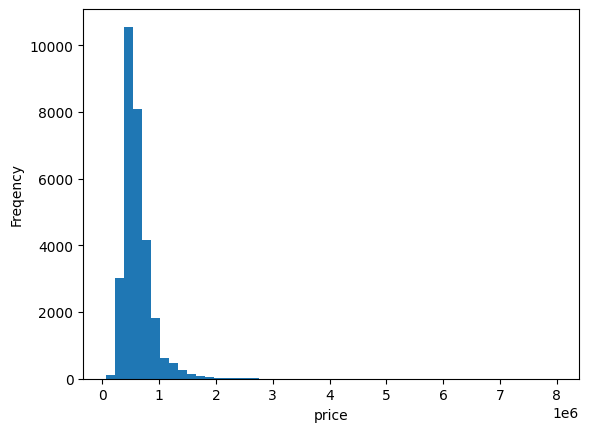

In [25]:
df['price'].plot(kind= 'hist', bins = 50)
plt.xlabel('price')
plt.ylabel('Freqency')
plt.show()

In [27]:
df[df['price'] > 500000]

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
7,2007-04-30,2606,1530000,house,4
12,2007-06-27,2612,850000,house,4
13,2007-06-28,2904,765000,house,4
14,2007-06-30,2615,517000,house,4
...,...,...,...,...,...
29567,2019-07-23,2912,549950,unit,3
29569,2019-07-24,2601,590000,unit,1
29576,2019-07-25,2612,560000,unit,2
29578,2019-07-26,2601,589000,unit,2
